In [10]:
%run /home/grg/git/alfa/nilearn-helper.py
import nibabel as nib
import sys
sys.path.append('/home/grg/git/alfa/')
sys.path.append('/home/grg/git/alfa/pyAAL/')
import pyAAL
import multireg_spm12 as mreg
import os.path as osp
%matplotlib inline

3.09023230617


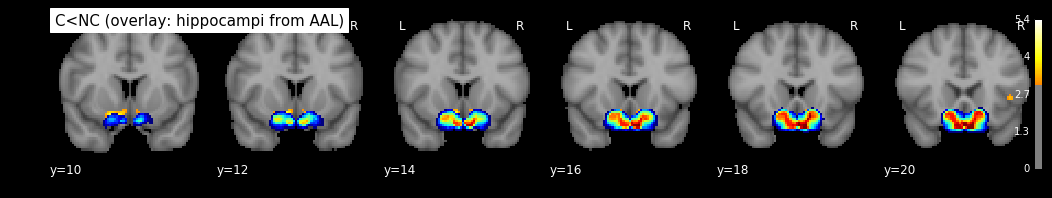

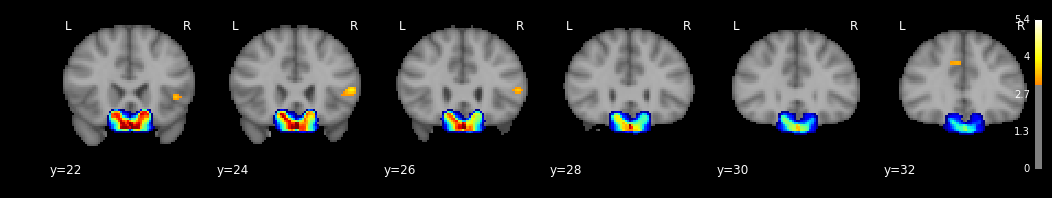

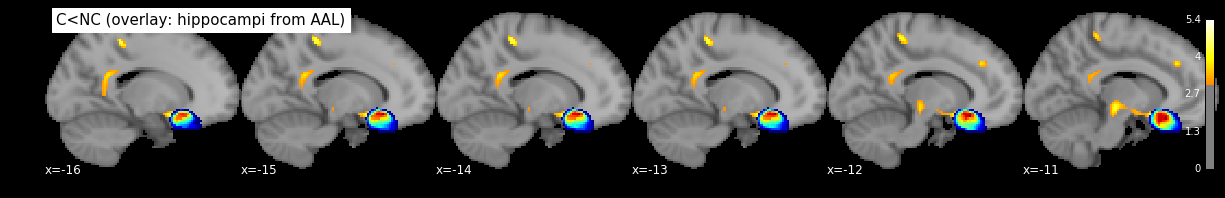

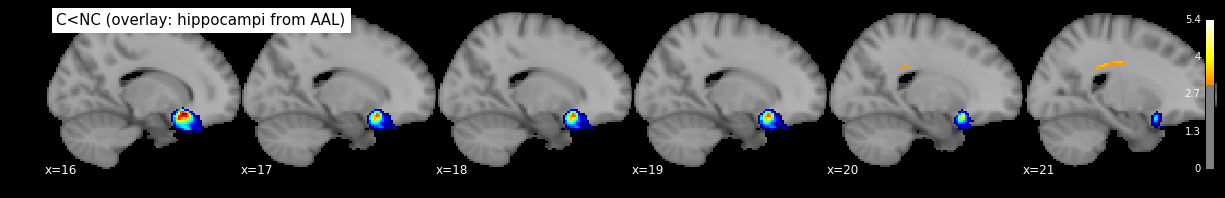

In [11]:
i=6
each = 'MD'
analysis_wd = '/tmp/output/'
excel_fp = '/home/grg/spm/designmatrix2.xls'
mask_fp = '/home/grg/spm/MNI_T1_brain_mask.nii'

img = osp.join(analysis_wd, each, 'analysis/estimatecontrasts/spmT_00%02d.nii'%i)
thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=30)
a = mreg.multiple_regression_analysis(each, excel_fp, '/tmp/output', mask_fp, verbose=False)
n3 = a.get_node('estimatecontrasts')
contrast_name = n3.inputs.contrasts[i-1][0]

print threshold1
#plotting.plot_stat_map(thresholded_map1, black_bg=True, threshold=threshold1, display_mode='x', cut_coords=range(0,5))
overlay = '/tmp/ch123_mni.nii'
hippocL = pyAAL.roi_mask('Hippocampus_L')
hippocR = pyAAL.roi_mask('Hippocampus_R')
from glob import glob
overlay = [] #hippocL, hippocR] #pyAAL.roi_mask(pyAAL.AAL_name(e)) for e in [2801,2802,2811,2812,2821,2822,2831,2832]]
overlay.extend(glob('/home/grg/data/templates/Zilles_Anatomy/OFC_Fo2.nii'))

title = '%s (overlay: hippocampi from AAL)'%contrast_name
plot_stat_map(thresholded_map1, row_l=6, axis='y', start = 10, end=28, step=2, title=title, threshold=threshold1, overlay=overlay)
plot_stat_map(thresholded_map1, row_l=6, axis='x', start = -16, end=-11, step=1, title=title, threshold=threshold1, overlay=overlay)
plot_stat_map(thresholded_map1, row_l=6, axis='x', start = 16, end=21, step=1, title=title, threshold=threshold1, overlay=overlay)